In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
! pip install ipywidgets

In [3]:
# model = torch.hub.load('yolov5', 'yolov5s', source='local')

In [4]:
# model

In [5]:
# img = 'https://ultralytics.com/images/zidane.jpg'
# results = model(img)
# results.print()

In [6]:
# import cv2 as cv
# import numpy as np
# from screen_record import window_capture
# from math import atan2, cos, sin, sqrt, pi


# def drawAxis(img, p_, q_, colour, scale):
#     p = list(p_)
#     q = list(q_)

#     angle = atan2(p[1] - q[1], p[0] - q[0])  # angle in radians
#     hypotenuse = sqrt((p[1] - q[1]) * (p[1] - q[1]) + (p[0] - q[0]) * (p[0] - q[0]))

#     # Here we lengthen the arrow by a factor of scale
#     q[0] = p[0] - scale * hypotenuse * cos(angle)
#     q[1] = p[1] - scale * hypotenuse * sin(angle)

#     cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)

#     # create the arrow hooks
#     p[0] = q[0] + 9 * cos(angle + pi / 4)
#     p[1] = q[1] + 9 * sin(angle + pi / 4)
#     cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)

#     p[0] = q[0] + 9 * cos(angle - pi / 4)
#     p[1] = q[1] + 9 * sin(angle - pi / 4)
#     cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)


# def getOrientation(pts, img):
#     sz = len(pts)
#     data_pts = np.empty((sz, 2), dtype=np.float64)

#     for i in range(data_pts.shape[0]):
#         data_pts[i, 0] = pts[i, 0, 0]
#         data_pts[i, 1] = pts[i, 0, 1]

#     # Perform PCA analysis
#     mean = np.empty((0))
#     mean, eigenvectors, eigenvalues = cv.PCACompute2(data_pts, mean)

#     # Store the center of the object
#     cntr = (int(mean[0, 0]), int(mean[0, 1]))

#     cv.circle(img, cntr, 3, (255, 0, 255), 2)
#     p1 = (
#         cntr[0] + 0.02 * eigenvectors[0, 0] * eigenvalues[0, 0],
#         cntr[1] + 0.02 * eigenvectors[0, 1] * eigenvalues[0, 0],
#     )
#     p2 = (
#         cntr[0] - 0.02 * eigenvectors[1, 0] * eigenvalues[1, 0],
#         cntr[1] - 0.02 * eigenvectors[1, 1] * eigenvalues[1, 0],
#     )
#     drawAxis(img, cntr, p1, (0, 255, 0), 1)
#     drawAxis(img, cntr, p2, (255, 255, 0), 5)
#     angle = atan2(eigenvectors[0, 1], eigenvectors[0, 0])  # orientation in radians

#     return angle, cntr
# # Window name
# WINDOW_NAME = "Hill Climb Racing"


# # Capture window 
# capture = window_capture(WINDOW_NAME)


# while cv.waitKey(1) != ord("q"):
#     # Capture frame
#     frame_hsv = capture.start_capture()
#     corrected_colors = cv2.cvtColor(frame_hsv, cv2.COLOR_BGR2GRAY)
    
#     # Make detections 
#     results = model(corrected_colors)
    
#     cv2.imshow('YOLO', np.squeeze(results.render()))

#     # Cv2.waitkey
#     if cv2.waitKey(1) & 0xFF==ord('q'):
#         break
# cv.destroyAllWindows()

## Now saving images to annotate and train the model on the data

In [7]:
import uuid   # Unique identifier
import os
import time

In [8]:
# current_dir = os.getcwd()
# dataset_folder = "dataset"
# IMAGES_PATH = os.path.join(current_dir , dataset_folder)
# # labels = ['left_obs', 'right_obs', 'timberman']
# number_imgs = 100


In [9]:
# # Loop over the frames
# for img_num in range(number_imgs): 
#     print('Collecting image number {}'.format(img_num))

#     frame_hsv = capture.start_capture()
#     imgname = os.path.join(IMAGES_PATH, str(uuid.uuid1())+'.jpg')
#     corrected_colors = cv2.cvtColor(frame_hsv, cv2.COLOR_BGR2GRAY)
#     cv2.imwrite(imgname, corrected_colors)

#     results = model(corrected_colors)
#     cv2.imshow('YOLO', np.squeeze(results.render()))
    
#     # 2 second delay between captures
#     time.sleep(0.8)

#     if cv2.waitKey(1) & 0xFF==ord('q'):
#         break
# cv2.destroyAllWindows()

In [10]:
# !git clone https://github.com/HumanSignal/labelImg.git


In [11]:
# !pip install pyqt5 lxml --upgrade
# !cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [12]:
# !cd yolov5 && python train.py --img 320 --batch 16 --epochs 2000 --data dataset.yml --weights yolov5s.pt --workers 2

In [13]:
model = torch.hub.load('yolov5', 'custom', source='local', path=r'D:\OneDrive - University at Buffalo\Projects\Misc\Hill Climb Racing\yolov5\runs\train\exp15\weights\best.pt')

YOLOv5  2024-2-10 Python-3.12.0 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7072156 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [14]:
test_img = r"D:\OneDrive - University at Buffalo\Projects\Misc\Hill Climb Racing\unlabeled_data\c25efa0d-c89e-11ee-8d3c-44af28f2b7f4.jpg"

In [15]:
results = model(test_img)
results.print()

image 1/1: 552x836 1 car, 1 fuel gauge, 1 coins, 1 gasoline, 1 gem
Speed: 72.3ms pre-process, 134.9ms inference, 501.3ms NMS per image at shape (1, 3, 448, 640)


In [16]:
# Get the class names
class_names = model.names

# Print the class names
print("Class names:", class_names)

# # Now find the index of the "car" class in the list of class names
# car_index = class_names.index("car")
# print("Index for 'car' class:", car_index)

Class names: {0: 'dog', 1: 'person', 2: 'cat', 3: 'tv', 4: 'car', 5: 'meatballs', 6: 'marinara sauce', 7: 'tomato soup', 8: 'chicken noodle soup', 9: 'french onion soup', 10: 'chicken breast', 11: 'ribs', 12: 'pulled pork', 13: 'hamburger', 14: 'cavity', 15: 'fuel gauge', 16: 'coins', 17: 'gasoline', 18: 'gem', 19: 'airtime bonus', 20: 'car-dead', 21: 'driver-down', 22: 'neck-flip'}


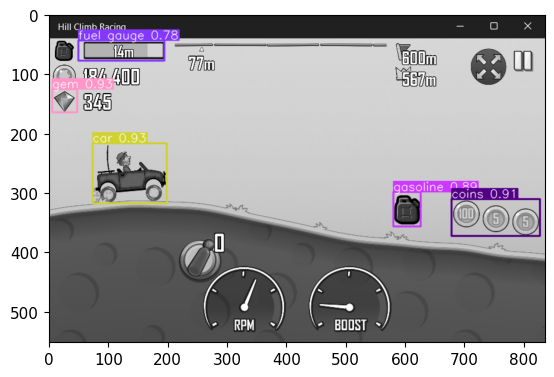

In [17]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [18]:
import cv2 as cv
import numpy as np
from screen_record import window_capture
from math import atan2, cos, sin, sqrt, pi


def drawAxis(img, p_, q_, colour, scale):
    p = list(p_)
    q = list(q_)

    angle = atan2(p[1] - q[1], p[0] - q[0])  # angle in radians
    hypotenuse = sqrt((p[1] - q[1]) * (p[1] - q[1]) + (p[0] - q[0]) * (p[0] - q[0]))

    # Here we lengthen the arrow by a factor of scale
    q[0] = p[0] - scale * hypotenuse * cos(angle)
    q[1] = p[1] - scale * hypotenuse * sin(angle)

    cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)

    # create the arrow hooks
    p[0] = q[0] + 9 * cos(angle + pi / 4)
    p[1] = q[1] + 9 * sin(angle + pi / 4)
    cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)

    p[0] = q[0] + 9 * cos(angle - pi / 4)
    p[1] = q[1] + 9 * sin(angle - pi / 4)
    cv.line(img, (int(p[0]), int(p[1])), (int(q[0]), int(q[1])), colour, 1, cv.LINE_AA)


def getOrientation(pts, img):
    sz = len(pts)
    data_pts = np.empty((sz, 2), dtype=np.float64)

    for i in range(data_pts.shape[0]):
        data_pts[i, 0] = pts[i, 0, 0]
        data_pts[i, 1] = pts[i, 0, 1]

    # Perform PCA analysis
    mean = np.empty((0))
    mean, eigenvectors, eigenvalues = cv.PCACompute2(data_pts, mean)

    # Store the center of the object
    cntr = (int(mean[0, 0]), int(mean[0, 1]))

    cv.circle(img, cntr, 3, (255, 0, 255), 2)
    p1 = (
        cntr[0] + 0.02 * eigenvectors[0, 0] * eigenvalues[0, 0],
        cntr[1] + 0.02 * eigenvectors[0, 1] * eigenvalues[0, 0],
    )
    p2 = (
        cntr[0] - 0.02 * eigenvectors[1, 0] * eigenvalues[1, 0],
        cntr[1] - 0.02 * eigenvectors[1, 1] * eigenvalues[1, 0],
    )
    drawAxis(img, cntr, p1, (0, 255, 0), 1)
    drawAxis(img, cntr, p2, (255, 255, 0), 5)
    angle = atan2(eigenvectors[0, 1], eigenvectors[0, 0])  # orientation in radians

    return angle, cntr






In [19]:
results.pred

[tensor([[5.17912e+00, 1.26651e+02, 4.70826e+01, 1.65829e+02, 9.29715e-01, 1.80000e+01],
         [7.37596e+01, 2.17732e+02, 1.98802e+02, 3.18668e+02, 9.27704e-01, 4.00000e+00],
         [6.78437e+02, 3.11374e+02, 8.27525e+02, 3.73029e+02, 9.10660e-01, 1.60000e+01],
         [5.80750e+02, 2.99656e+02, 6.26352e+02, 3.57173e+02, 8.89388e-01, 1.70000e+01],
         [4.97913e+01, 4.41137e+01, 1.94626e+02, 7.80578e+01, 7.79620e-01, 1.50000e+01]], device='cuda:0')]

In [20]:
results.print()

image 1/1: 552x836 1 car, 1 fuel gauge, 1 coins, 1 gasoline, 1 gem
Speed: 72.3ms pre-process, 134.9ms inference, 501.3ms NMS per image at shape (1, 3, 448, 640)


In [21]:
results.names

{0: 'dog',
 1: 'person',
 2: 'cat',
 3: 'tv',
 4: 'car',
 5: 'meatballs',
 6: 'marinara sauce',
 7: 'tomato soup',
 8: 'chicken noodle soup',
 9: 'french onion soup',
 10: 'chicken breast',
 11: 'ribs',
 12: 'pulled pork',
 13: 'hamburger',
 14: 'cavity',
 15: 'fuel gauge',
 16: 'coins',
 17: 'gasoline',
 18: 'gem',
 19: 'airtime bonus',
 20: 'car-dead',
 21: 'driver-down',
 22: 'neck-flip'}

In [22]:
import cv2
import numpy as np
import time
from math import atan2, pi
from screen_record import window_capture

# # Define the function to draw axis
# def drawAxis(img, p_, q_, colour, scale):
#     # Implementation remains the same as in your code

def getOrientationAndAngle(pts, img, reference_direction=(0, 1)):
    sz = len(pts)
    data_pts = np.empty((sz, 2), dtype=np.float64)

    for i in range(data_pts.shape[0]):
        data_pts[i, 0] = pts[i, 0, 0]
        data_pts[i, 1] = pts[i, 0, 1]

    # Perform PCA analysis
    mean = np.empty((0))
    mean, eigenvectors, eigenvalues = cv2.PCACompute2(data_pts, mean)

    # Store the center of the object
    cntr = (int(mean[0, 0]), int(mean[0, 1]))

    # Draw axes for visualization
    cv.circle(img, cntr, 3, (255, 0, 255), 2)
    p1 = (
        cntr[0] + 0.02 * eigenvectors[0, 0] * eigenvalues[0, 0],
        cntr[1] + 0.02 * eigenvectors[0, 1] * eigenvalues[0, 0],
    )
    p2 = (
        cntr[0] - 0.02 * eigenvectors[1, 0] * eigenvalues[1, 0],
        cntr[1] - 0.02 * eigenvectors[1, 1] * eigenvalues[1, 0],
    )
    drawAxis(img, cntr, p1, (0, 255, 0), 1)
    drawAxis(img, cntr, p2, (255, 255, 0), 5)

    # Calculate angle between major eigenvector and reference direction
    angle_eigenvector = atan2(eigenvectors[0, 1], eigenvectors[0, 0])  # in radians

    # Calculate angle difference relative to reference
    angle_difference = angle_eigenvector - atan2(reference_direction[1], reference_direction[0])

    # Adjust for 360-degree angles (optional, depending on game mechanics)
    angle_difference = (angle_difference + 2 * pi) % (2 * pi)

    return angle_difference, cntr



# Window name
WINDOW_NAME = "Hill Climb Racing"

# Capture window
capture = window_capture(WINDOW_NAME)

# Variable to store the start time
start_time = time.time()

# Index of the "car" class
car_index = 4  # "car" class index is 4, starting from 0

# Variable to store the last computed angle
last_angle = None

while cv2.waitKey(1) != ord("q"):
    # Capture frame
    frame_hsv = capture.start_capture()
    corrected_colors = cv2.cvtColor(frame_hsv, cv2.COLOR_BGR2GRAY)

    # Make detections
    results = model(corrected_colors)

    # Convert tensor to numpy array
    detections = results.pred[0].cpu().numpy()

    # Iterate through detections
    for detection in detections:
        # Check if the class index matches the "car" index
        if int(detection[5]) == car_index:
            bbox = detection[:4]
            x1, y1, x2, y2 = bbox.astype(int)

            # Compute the center of the car
            center_x = (x1 + x2) // 2
            center_y = (y1 + y2) // 2

            # Draw a circle to visualize the center
            cv2.circle(corrected_colors, (center_x, center_y), 3, (255, 0, 255), 2)

            # Extract contour points of the car
            contour_pts = np.array([[[x1, y1]], [[x2, y1]], [[x2, y2]], [[x1, y2]]])

            # Print contour points for debugging
            print("Contour points:", contour_pts)

            # Get the orientation angle and center of the car
            reference_direction = (1, 0)  # Assuming rightward reference
            angle, cntr = getOrientationAndAngle(contour_pts, corrected_colors, reference_direction)

            # Display the angle
            print("Angle of rotation:", angle * 180 / pi)

            # Update the last computed angle
            last_angle = angle

    render_image = np.squeeze(results.render())
    if len(render_image.shape) == 3:
        render_image = cv2.cvtColor(render_image, cv2.COLOR_RGB2GRAY)
    debug_image = np.hstack((corrected_colors, render_image))

    # Concatenate the image with detections and the debug information horizontally
    # debug_image = np.hstack((corrected_colors, np.squeeze(results.render())))

    # Display the concatenated image
    cv2.imshow('YOLO', debug_image)

    # Check if 3 seconds have passed
    if time.time() - start_time >= 3:
        if last_angle is not None:
            # Print the angle after every 3 seconds if it's computed
            print("Rotational angle after 3 seconds:", last_angle * 180 / pi)
        else:
            # Otherwise, indicate that no angle was computed
            print("Rotational angle after 3 seconds: No angle computed")
        
        # Reset the start time
        start_time = time.time()

    # Check for the 'q' key press to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Close all OpenCV windows
cv2.destroyAllWindows()


Contour points: [[[158 229]]

 [[304 229]]

 [[304 357]]

 [[158 357]]]
Angle of rotation: 0.0
Contour points: [[[160 229]]

 [[305 229]]

 [[305 357]]

 [[160 357]]]
Angle of rotation: 0.0
Contour points: [[[161 229]]

 [[306 229]]

 [[306 358]]

 [[161 358]]]
Angle of rotation: 0.0
Contour points: [[[162 229]]

 [[306 229]]

 [[306 357]]

 [[162 357]]]
Angle of rotation: 0.0
Contour points: [[[163 229]]

 [[307 229]]

 [[307 356]]

 [[163 356]]]
Angle of rotation: 0.0
Contour points: [[[166 230]]

 [[306 230]]

 [[306 356]]

 [[166 356]]]
Angle of rotation: 0.0
Contour points: [[[166 230]]

 [[307 230]]

 [[307 355]]

 [[166 355]]]
Angle of rotation: 0.0
Contour points: [[[168 231]]

 [[306 231]]

 [[306 355]]

 [[168 355]]]
Angle of rotation: 0.0
Contour points: [[[169 231]]

 [[306 231]]

 [[306 355]]

 [[169 355]]]
Angle of rotation: 0.0
Contour points: [[[170 231]]

 [[307 231]]

 [[307 354]]

 [[170 354]]]
Angle of rotation: 0.0
Contour points: [[[171 232]]

 [[307 232]]

 [[307